# Predicting Home Value
Due to our dataset find, our team has changed our scope from predicting home features to predicting home price using different statistical approaches. Together we will trial and error multiple algorithms and explore there utility in predicting home prices. Across these different algorithms we will use similar metrics such as MSE to determine the relative success of the model.

## Our Scope
A real estate investment firm has tasked our Group1 consulting team to develop a model to predict home prices based on a set of given parameters. Obviously we know location is the biggest idicator of home prices, but our team will use a combination of other home features to figure out the value of a home

## Our Data
We will be using the a publically availble dataset from Kaggle. The data contained in the set Austin, TX House Listings. It was scraped in January 2021 and is highly ranked on Kaggle for being clean and usable. Below is the link to the dataset.
https://www.kaggle.com/datasets/ericpierce/austinhousingprices?resource=download

# Familiarizing with Dataset

In [1]:
# import pandas for EDA
import pandas as pd

In [71]:
file_path = 'austinHousingData.csv'
df = pd.read_csv(file_path)
df.head(3)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

As you can see from the initial info() method, the dataset itself is very clean and usable. There isn't much data pre-processing needed in order to clean the data since there are no null values, and the majority of features are in a usable format.

### Dropping non-int and changing booleans
The only pre-processing we will need to do is to drop any d-type that is not an integer, like columns city, streetAddress, and description. We still have longitute and latitude so location is still within the dataset. Also we want to change the true and false values to 1's and 0's to make the entire dataset numerical.

In [73]:
#Droping the columns that are strings
col_drop_list = ['city', 'streetAddress', 'description', 'homeType','latest_saledate', 'latestPriceSource', 'homeImage' ]
df = df.drop(col_drop_list, axis=1)

df.shape

(15171, 40)

In [74]:
#Changing bool to int
col_bool_list = ['hasAssociation', 'hasCooling', 
                 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

for col in col_bool_list:
    name = col + '_int'
    df[name] = df[col].astype(int)

df.shape

(15171, 46)

In [75]:
df.hasAssociation_int.value_counts()

1    8007
0    7164
Name: hasAssociation_int, dtype: int64

In [76]:
#Drop the bool columns
df = df.drop(col_bool_list, axis=1)
df.shape

(15171, 40)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   zipcode                     15171 non-null  int64  
 2   latitude                    15171 non-null  float64
 3   longitude                   15171 non-null  float64
 4   propertyTaxRate             15171 non-null  float64
 5   garageSpaces                15171 non-null  int64  
 6   parkingSpaces               15171 non-null  int64  
 7   yearBuilt                   15171 non-null  int64  
 8   latestPrice                 15171 non-null  int64  
 9   numPriceChanges             15171 non-null  int64  
 10  latest_salemonth            15171 non-null  int64  
 11  latest_saleyear             15171 non-null  int64  
 12  numOfPhotos                 15171 non-null  int64  
 13  numOfAccessibilityFeatures  151

Now the data should be cleaned, all numeric, and ready to be used in the analysis.

## Analysis
In this lineal regression model We will work all features.

### Creating testing and training data
In this next step we will be creating the testing and training data for our algorithm. 

In [9]:
# Getting column names
column_names=df.columns.tolist()
type(column_names)

list

In [10]:
# Deleting the name of the dependent name 'latestPrice'
column_names.remove('latestPrice')

In [11]:
# Independent values
X = df[column_names]

# Dependent values
y = df['latestPrice']

In [12]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Comparing size of X sets
print(X.shape, X_train.shape, X_test.shape)

(15171, 39) (12136, 39) (3035, 39)


### Linear regression with StatsModels

In [14]:
import statsmodels.api as sm

In [15]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [16]:
# Get model results
results = model.fit()

In [17]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     247.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:42:32   Log-Likelihood:            -1.7149e+05
No. Observations:               12136   AIC:                         3.431e+05
Df Residuals:                   12096   BIC:                         3.434e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Coeffincient of determination is 0.44 that's not a good number, the better is close to 1
this model is explainin only the 44% of data

### Evaluation

In [18]:
# Get prediction with X_train using the model
y_train_pred = results.predict(sm.add_constant(X_train))
y_train_pred.shape

(12136,)

In [19]:
# RMSE
from sklearn.metrics import mean_squared_error
RMSE_train=mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_train

331574.1996992208

Our model is off by about 331574 dollars in a given prediction

it's a bad number

In [20]:
# Get prediction with X_train using the model
y_test_pred = results.predict(sm.add_constant(X_test))

In [21]:
RMSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
RMSE_test

375425.40475539543

In [22]:
# as long as the difference is small the model is consistent
diff = (RMSE_test - RMSE_train)/ RMSE_test *100
diff

11.680404282908201

In [23]:
# Identifying highly correlated predictor
correlated_features=df.corr()['latestPrice']

In [24]:
# Sorting correlations in features
correlated_features.sort_values(ascending=False)

latestPrice                   1.000000
numOfBathrooms                0.504738
livingAreaSqFt                0.467034
numOfBedrooms                 0.299839
avgSchoolRating               0.293101
numOfStories                  0.200555
MedianStudentsPerTeacher      0.198208
hasSpa_int                    0.173084
garageSpaces                  0.157443
parkingSpaces                 0.156811
numOfElementarySchools        0.155988
numOfPhotos                   0.154355
hasView_int                   0.133969
numOfMiddleSchools            0.127838
numOfWaterfrontFeatures       0.123979
numOfParkingFeatures          0.098384
avgSchoolDistance             0.094156
numOfPatioAndPorchFeatures    0.087936
avgSchoolSize                 0.085167
hasGarage_int                 0.074161
latitude                      0.071547
latest_saleyear               0.059942
yearBuilt                     0.059692
numOfSecurityFeatures         0.058349
numOfWindowFeatures           0.056141
numPriceChanges          

We can see that the features with highest correlation with latestPrice are:
* numOfBathrooms                0.504738
* livingAreaSqFt                0.467034
* numOfBedrooms                 0.299839
* avgSchoolRating               0.293101
* numOfStories                  0.200555

We will train a new model using this features


In [25]:
# Independent values
X = df[['numOfBathrooms', 'livingAreaSqFt', 'numOfBedrooms', 'avgSchoolRating', 'numOfStories']]

# Dependent values
y = df['latestPrice']

In [26]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [28]:
# Get model results
results = model.fit()

In [29]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     1197.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:42:32   Log-Likelihood:            -1.7261e+05
No. Observations:               12136   AIC:                         3.452e+05
Df Residuals:                   12130   BIC:                         3.453e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6159.5433   1.66e+04     

we will add more features:
* MedianStudentsPerTeacher      0.198208
* hasSpa_int                    0.173084
* garageSpaces                  0.157443
* parkingSpaces                 0.156811
* numOfElementarySchools        0.155988
* numOfPhotos                   0.154355
* hasView_int                   0.133969
* numOfMiddleSchools            0.127838
* numOfWaterfrontFeatures       0.123979

In [30]:
# Independent values
X = df[['numOfBathrooms', 'livingAreaSqFt', 'numOfBedrooms', 'avgSchoolRating', 'numOfStories','MedianStudentsPerTeacher',
        'hasSpa_int','garageSpaces','parkingSpaces','numOfElementarySchools','numOfPhotos','hasView_int','numOfMiddleSchools']]

# Dependent values
y = df['latestPrice']

In [31]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [33]:
# Get model results
results = model.fit()

In [34]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     484.7
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:42:32   Log-Likelihood:            -1.7250e+05
No. Observations:               12136   AIC:                         3.450e+05
Df Residuals:                   12122   BIC:                         3.451e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We will add more features:
* zipcode                      -0.145946
* numOfPrimarySchools          -0.170927
* longitude                    -0.184079
* numOfHighSchools             -0.201821

In [35]:
# Independent values
X = df[['numOfBathrooms', 'livingAreaSqFt', 'numOfBedrooms', 'avgSchoolRating', 'numOfStories','MedianStudentsPerTeacher',
        'hasSpa_int','garageSpaces','parkingSpaces','numOfElementarySchools','numOfPhotos','hasView_int','numOfMiddleSchools',
        'zipcode','numOfPrimarySchools', 'longitude','numOfHighSchools']]

# Dependent values
y = df['latestPrice']

In [36]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [38]:
# Get model results
results = model.fit()

In [39]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     413.2
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:42:33   Log-Likelihood:            -1.7227e+05
No. Observations:               12136   AIC:                         3.446e+05
Df Residuals:                   12118   BIC:                         3.447e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

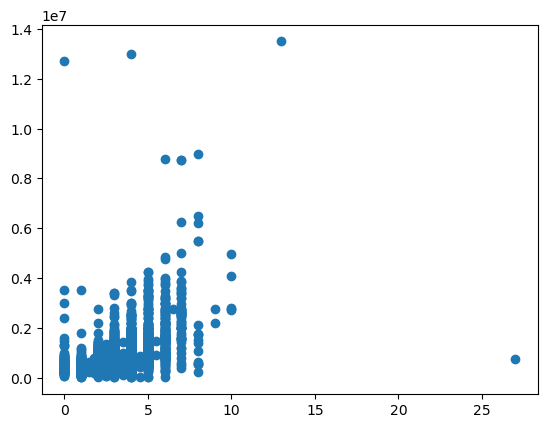

In [40]:
import matplotlib.pyplot as plt
plt.scatter(df['numOfBathrooms'],df['latestPrice'])
plt.show()

## All features and leading with outliers

### Creating testing and training data
In this next step we will be creating the testing and training data for our algorithm. 

In [174]:
# prices below 1 000 000
df_out = df[df['latestPrice']<14000000]
df_out = df_out.sort_values(by='latestPrice')

In [175]:
df_out.shape

(15171, 40)

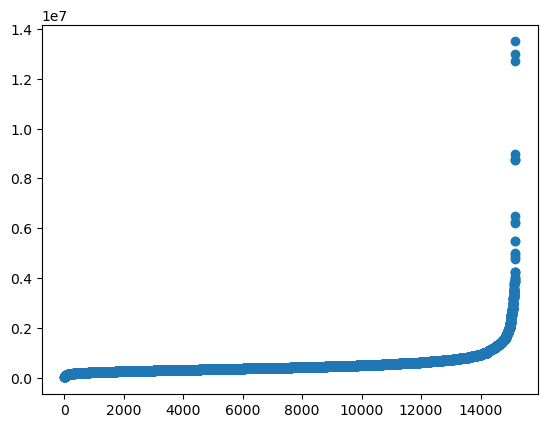

In [176]:
# Getting serires of number of houses, x
x_out = len(df_out[['latestPrice']])
x=range(x_out)
len(x)

# Setting prices in y
y=df_out['latestPrice'].values
y.shape

# Plotting data in scatter
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [177]:
# Getting column names
column_names=df_out.columns.tolist()
type(column_names)

list

In [178]:
# Deleting the name of the dependent name 'latestPrice'
column_names.remove('latestPrice')

In [179]:
# Independent values
X = df_out[column_names]

# Dependent values
y = df_out['latestPrice']

In [180]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
# Comparing size of X sets
print(X.shape, X_train.shape, X_test.shape)

(15171, 39) (12136, 39) (3035, 39)


### Linear regression with StatsModels

In [182]:
import statsmodels.api as sm

In [183]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [184]:
# Get model results
results = model.fit()

In [185]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:06:38   Log-Likelihood:            -1.7101e+05
No. Observations:               12136   AIC:                         3.421e+05
Df Residuals:                   12096   BIC:                         3.424e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Coeffincient of determination is 0.44 that's not a good number, the better is close to 1
this model is explainin only the 44% of data

### Evaluation

In [186]:
# Get prediction with X_train using the model
y_train_pred = results.predict(sm.add_constant(X_train))
y_train_pred.shape

(12136,)

In [187]:
# RMSE
from sklearn.metrics import mean_squared_error
RMSE_train=mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_train

318759.53647451557

Our model is off by about 331574 dollars in a given prediction

it's a bad number

In [163]:
# Get prediction with X_train using the model
y_test_pred = results.predict(sm.add_constant(X_test))

In [164]:
RMSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
RMSE_test

265175.6788711438

In [165]:
# as long as the difference is small the model is consistent
diff = (RMSE_test - RMSE_train)/ RMSE_test *100
diff

-1.7194721357501188